In [1]:
# API_KEY
API_KEY = "YOUR_API_KEY"

# API Client Library
import googleapiclient.discovery

# API Information
api_service_name = "youtube"
api_version = "v3"

# Creating Youtube resource object
youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey = API_KEY)
# Request Body
request = youtube.search().list(
        part="id, snippet",
        maxResults=50, # First 50 items
        order="viewCount",
        q="The Matrix Resurrections", # Search string
        regionCode="US", # Region that video published
        relevanceLanguage="en", # Language that video published
        type="video",
        fields="items(id(videoId), snippet(publishedAt,channelId,channelTitle,title,description))"
)
# Request Execution
response = request.execute()
# View JSON Object
print(response)

{'items': [{'id': {'videoId': '9ix7TUGVYIo'}, 'snippet': {'publishedAt': '2021-09-09T12:58:11Z', 'channelId': 'UCjmJDM5pRKbUlVIzDYYWb6g', 'title': 'The Matrix Resurrections – Official Trailer 1', 'description': 'The Matrix Resurrections in theaters and on HBO Max December 22 #TheMatrixMovie ...', 'channelTitle': 'Warner Bros. Pictures'}}, {'id': {'videoId': 'nNpvWBuTfrc'}, 'snippet': {'publishedAt': '2021-12-06T17:00:29Z', 'channelId': 'UCjmJDM5pRKbUlVIzDYYWb6g', 'title': 'The Matrix Resurrections – Official Trailer 2', 'description': 'Remember what is real. Watch the new trailer for The Matrix Resurrections now – in theaters and on HBO Max 12.22.21.', 'channelTitle': 'Warner Bros. Pictures'}}, {'id': {'videoId': 'e7ShFq3kMVk'}, 'snippet': {'publishedAt': '2021-12-03T12:30:07Z', 'channelId': 'UC2FrJXBb3WVAKZ8jpxkZxlA', 'title': 'The Matrix Resurrections | Fighting Promo', 'description': 'Get Ready to experience the Mind-Boggling Action Movie, #TheMatrixResurrections starring Keanu Reev

In [2]:
# First Response
print("RESPONSE 1")
print("Video id:", response['items'][0]['id']['videoId'])
print("Publish Date:", response['items'][0]['snippet']['publishedAt'])
print("Title:", response['items'][0]['snippet']['title'])

RESPONSE 1
Video id: 9ix7TUGVYIo
Publish Date: 2021-09-09T12:58:11Z
Title: The Matrix Resurrections – Official Trailer 1


In [3]:
# Details of First Response in JSON
ss = youtube.videos().list(
    part="statistics, contentDetails, snippet",
    id="9ix7TUGVYIo",
    fields="items(statistics, snippet(title), contentDetails(duration))").execute()
print(ss)
ss['items'][0]['snippet']['title']

{'items': [{'snippet': {'title': 'The Matrix Resurrections – Official Trailer 1'}, 'contentDetails': {'duration': 'PT2M53S'}, 'statistics': {'viewCount': '45685692', 'likeCount': '845808', 'favoriteCount': '0', 'commentCount': '85830'}}]}


'The Matrix Resurrections – Official Trailer 1'

In [4]:
# Dictionary to store video data
matrix_res = {
    'Title':[],
    'ID':[],
    'Duration':[],
    'Views':[],
    'Likes':[],
    'Comments':[]
}

In [5]:
# Items object extraction
for item in response['items']:
    # Getting the id
    vidId = item['id']['videoId']
    # Getting stats of the video
    r = youtube.videos().list(
        part="statistics, contentDetails, snippet",
        id=vidId,
        fields="items(statistics, contentDetails(duration), snippet(title))"
    ).execute()
    # try/except block is for getting which contains all properties we need
    try:
        # Taking info out of items dictionary
        title = r['items'][0]['snippet']['title']
        duration = r['items'][0]['contentDetails']['duration']
        views = r['items'][0]['statistics']['viewCount']
        likes = r['items'][0]['statistics']['likeCount']
        comments = r['items'][0]['statistics']['commentCount']
        # Appending to new dictionary
        matrix_res['Title'].append(title)
        matrix_res['ID'].append(vidId)
        matrix_res['Duration'].append(duration)
        matrix_res['Views'].append(views)
        matrix_res['Likes'].append(likes)
        matrix_res['Comments'].append(comments)
    except:
        pass

In [6]:
import pandas as pd
# From dictionary to dataframe
matrix_df = pd.DataFrame.from_dict(matrix_res)
print(matrix_df.head())

                                               Title           ID Duration  \
0      The Matrix Resurrections – Official Trailer 1  9ix7TUGVYIo  PT2M53S   
1      The Matrix Resurrections – Official Trailer 2  nNpvWBuTfrc  PT2M50S   
2          The Matrix Resurrections | Fighting Promo  e7ShFq3kMVk    PT30S   
3  Red and Blue from The Matrix Resurrections #sh...  GtV7eT1mQuw    PT12S   
4  The Matrix Resurrections - Official Trailer (2...  gzEGBAG8x5U  PT2M59S   

      Views   Likes Comments  
0  45685692  845808    85830  
1  15471075  196882    26410  
2  14213632    2282      126  
3  10410541  221864      580  
4   9676138  274754    25983  


In [7]:
# Retrieving Youtube video result of 1st video ID
video_response_1=youtube.commentThreads().list(
part='snippet',
videoId="9ix7TUGVYIo",
order='relevance',
maxResults=10
).execute()
# Retrieving most relevant comment of 1st video ID
print(video_response_1['items'][0]['snippet']['topLevelComment']['snippet']['textDisplay'])

Everything that has a begining has and end... And a sequel


In [8]:
# Creation of dataframe that holds comments
comment_df = pd.DataFrame(columns=["video_ID", "Comment", "Reply_Count"])

In [9]:
# Extracting comments for 50 videos
for video_id in matrix_df['ID']:
    
    # Retrieving 10 most relevant Youtube comment results
    video_response=youtube.commentThreads().list(
    part='snippet',
    videoId=video_id,
    order='relevance', 
    textFormat='plainText',
    maxResults=10
    ).execute()  
        
    # Extracting required info from each result object 
    for item in video_response['items']:
            
        # Extracting comments
        comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
              
        # Counting number of reply of comment
        replycount = item['snippet']['totalReplyCount']
        
        # Appending to dataframe
        comment_df = comment_df.append({"video_ID": video_id, "Comment": comment, "Reply_Count": replycount}, ignore_index=True)


In [10]:
print(comment_df.head())
print(comment_df.dtypes)

      video_ID                                            Comment Reply_Count
0  9ix7TUGVYIo  Everything that has a begining has and end... ...         439
1  9ix7TUGVYIo  No matter what you think of this movie, this t...           0
2  9ix7TUGVYIo  They did a damn good job at making this movie ...           9
3  9ix7TUGVYIo  Não me canso de ver esse trailer e de lembrar ...           0
4  9ix7TUGVYIo  The official trailer looked epic to me, and th...           2
video_ID       object
Comment        object
Reply_Count    object
dtype: object


In [11]:
from langdetect import detect

#Comment language detection
def detect_non_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Filtering comments with only English comments
comment_df = comment_df[comment_df['Comment'].apply(detect_non_en)]

In [58]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()

add_stop = ['', 'movie', 'matrix', 'just', 's', 'really', 'im', 'film', 't']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# Text preprocessing 
def process_text(text):
    tokens = tokenizer.tokenize(text)
    tokens = [each.lower() for each in tokens] 
    tokens = [re.sub(r"[^a-zA-Z0-9]", "", each) for each in tokens]
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(each, get_wordnet_pos(each)) for each in tokens]
    return tokens

# Lemmatize with POS Tag
def get_wordnet_pos(word):
    # Map POS tag to first character that lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

comment_df['processed_text'] = comment_df['Comment'].apply(process_text)
print(comment_df['processed_text'])

0                                [begining, end, sequel]
1      [matter, think, trailer, best, building, hype,...
2      [do, damn, good, job, make, look, good, prop, ...
4      [official, trailer, look, epic, background, mu...
5      [fun, story, film, right, outside, office, dow...
                             ...                        
495    [man, difference, time, make, difference, time...
496    [nail, proceed, exactly, predict, didnt, expec...
497    [drink, feel, like, underrated, character, tri...
498    [hidden, meaning, rubber, duck, rubber, duck, ...
499    [aaaaand, end, exactly, 735, perfect, apart, d...
Name: processed_text, Length: 384, dtype: object


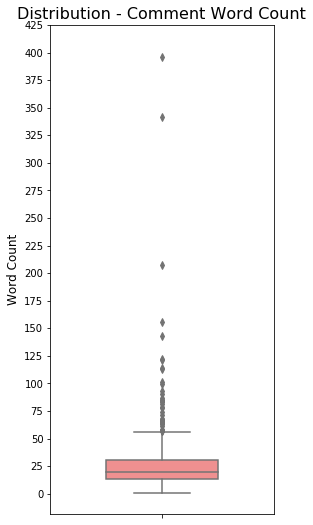

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Word count calculation
def word_count(text):
    return len(str(text).split(' '))

comment_df['word_count'] = comment_df['Comment'].apply(word_count)

# Plot a boxplot of the word counts
fig = plt.figure(figsize=(4,9))

sns.boxplot(
    comment_df['word_count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Comment Word Count', fontsize=16)
plt.yticks(np.arange(0, 450, 25))

plt.show()

In [64]:
from collections import Counter
# Get the top 20 most common words among all the comments
p_text = comment_df['processed_text']

# Flaten the list of lists
p_text = [item.upper() for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

print(top_20)

        word  frequency
0       LIKE         62
1        NEO         61
2       LOVE         53
3      WATCH         46
4      KEANU         45
5    TRAILER         43
6       LOOK         40
7       TIME         40
8        SAY         38
9         DO         33
10      MAKE         32
11     THINK         31
12     SCENE         31
13      GOOD         29
14     MOVIE         29
15  ORIGINAL         29
16        GO         28
17       GET         27
18     GREAT         27
19      COME         27


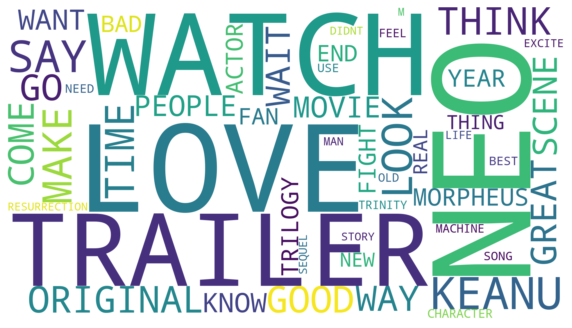

In [63]:
# Worldcloud representation
import wordcloud as wc
wordcloud = wc.WordCloud(background_color ='white',
                         width=1920,height=1080,
                         min_font_size = 5,
                         max_words=50,
                         contour_color='black', contour_width=3).generate(' '.join(p_text))
plt.figure(figsize = (10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()